In [1]:
import numpy as np
import pandas as pd
import re
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

def data_with_rating(text):   
    x =  re.search(r'(\d+(\.\d+)?)/10',text)
    if x != None:
        num, denom = x.group().split('/')
        return ( float(num) )
    return(x)

def convert_date(temp):
    dt_object =  dt.datetime.strptime(temp,'%Y-%m-%d %H:%M:%S')
    return dt_object

def to_timestamp(dt_object):
    return dt_object.timestamp()


dog_rate_tweets = pd.read_csv('dog_rates_tweets.csv')
new_dog_rate = dog_rate_tweets['text'].apply(data_with_rating)
dog_rate_tweets['rating']= new_dog_rate
dog_rate_tweets = dog_rate_tweets.drop(dog_rate_tweets[pd.isnull(dog_rate_tweets.rating)].index)
dog_rate_tweets = dog_rate_tweets.drop(dog_rate_tweets[(dog_rate_tweets.rating)>25].index)

dog_rate_tweets.created_at = dog_rate_tweets['created_at'].apply(convert_date)


dog_rate_tweets['timestamp'] = dog_rate_tweets['created_at'].apply(to_timestamp)
fit = stats.linregress(dog_rate_tweets['timestamp'], dog_rate_tweets['rating'])
dog_rate_tweets['prediction'] = dog_rate_tweets['timestamp']*fit.slope + fit.intercept




In [2]:
dog_rate_tweets

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,13.185763
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,13.181785
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,13.179609
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,13.167614
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,13.163804
...,...,...,...,...,...,...
7363,1032725635888803841,2018-08-23 20:25:53,This is Noodles. He had brain surgery earlier ...,14.0,1.535056e+09,13.507338
7369,1032310288652152832,2018-08-22 16:55:26,This is Pingo and Nina. They are believed to b...,14.0,1.534957e+09,13.503856
7381,1031696422813544448,2018-08-21 00:16:09,This is Nikita. She got caught in some wild fl...,13.0,1.534811e+09,13.498710
7431,1029767403545288706,2018-08-15 16:30:55,This is Winston. He came home for the first ti...,14.0,1.534351e+09,13.482540


In [3]:
fit.slope, fit.intercept 

(3.515929974847721e-08, -40.46415480898916)

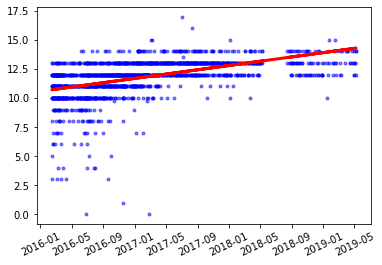

In [4]:
plt.xticks(rotation=25)
plt.plot(dog_rate_tweets['created_at'].dt.date, dog_rate_tweets['rating'].values,'b.',alpha=0.5)
plt.plot(dog_rate_tweets['created_at'].dt.date, dog_rate_tweets['prediction'].values,'r-', linewidth = 3)
plt.show()